In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
from pathlib import Path

ModuleNotFoundError: No module named 'pycocotools'

In [2]:
coco_annotation_file_path = "../data/livecell_coco_train.json"

coco_annotation = COCO(annotation_file=coco_annotation_file_path)

# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.


loading annotations into memory...
Done (t=22.14s)
creating index...
index created!
Number of Unique Categories: 1
Category IDs:
[1]


In [3]:
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Categories Names:
['cell']


In [4]:

# Category ID -> Category Name.
query_id = cat_ids[0]
print("Category Name -> ID:")

# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing: {len(img_ids)}")

Category Name -> ID:
Number of Images Containing: 3253


A172_Phase_B7_2_00d12h00m_1.tif


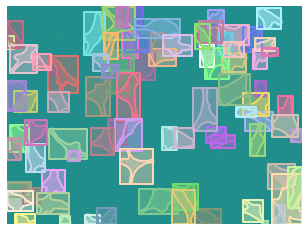

In [7]:
# Pick one image.
img_id = img_ids[0]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
print(img_file_name)
splitted = img_file_name.split("_")
img_path = Path("../data/images/livecell_train_val_images/") / splitted[0] / img_file_name
# img_url = img_info["coco_url"]
# print(
#     f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
# )

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)

im = Image.open(img_path)
# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)
plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
plt.show()